In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kalman import LDSNet

# Weiner Process

Describes a stochastic process $W$ which is driven by noise $w$ and governed by

$$dW/dt=v$$

The process is characterized $W(t+\Delta t)-W(t)\sim\mathcal{N}(0, \Delta t)$ (i.e., normally-distributed with mean 0 and variance $\Delta t$.

Discretize the stochastic differential equation SDE by chopping up time into $\Delta t$-sized bins and apply the Euler step

\begin{align}
\frac{W_{t+\Delta t}-W_t}{\Delta t} &= v_t \\
W_{t+\Delta t} &= W_t + \Delta tv_t \\
\end{align}

So that $W_{t+\Delta t}-W_t~\sim\mathcal{N}(0, \Delta t)$, we'll need to set $v_t~\sim\mathcal{N}\left(0, \frac{1}{\Delta t}\right)$

As an alternative, we could use the update $W_{t+\Delta t} = W_t + \sqrt{\Delta t}\tilde{v}_t$ where $\tilde{v}_t\sim\mathcal{N}(0, 1)$


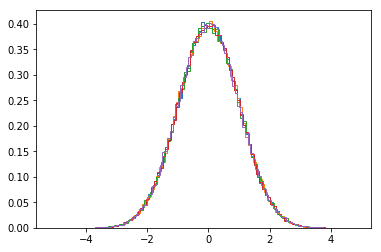

In [2]:
T = 1
dts = [1, 0.5, 0.1, 0.05, 0.01]
runs = 100000
data = {}
for dt in dts:
    N = int(np.round(T/dt))
    dW = np.random.randn(runs, N)*np.sqrt(dt)
    W = np.zeros((runs, N+1))
    W[:, 1:] = np.cumsum(dW, axis=1)
    data[dt] = W
    plt.hist(W[:, -1], bins=100, density=True, histtype="step")


Showing a 3 sample paths for each dt

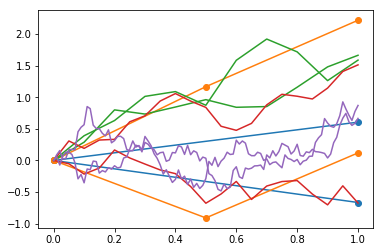

In [10]:
# plot trajectories
N_PLOT = 2
for dt in dts:
    N = int(np.round(T/dt))
    trange = np.arange(N+1)*dt
    if N <= 5:
        plt_style = "-o"
    else:
        plt_style = "-"
    color = plt.plot(trange, data[dt][0, :], plt_style)[0].get_color()
    for plt_idx in range(N_PLOT)[1:]:
        plt.plot(trange, data[dt][plt_idx+1, :], plt_style, color=color)


Note how regardless of time discretization, the variance grows at the same rate 

In [4]:
# plot variance over time
# for dt in dts:
#     plt.hist(W[:, -1], bins=100, density=True, histtype="step")
